In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def f(size):
    x = np.linspace(0, 5, size)
    y = x * np.sin(x ** 2) + 1
    return (x, y)

def sample(size):
    x = np.linspace(0, 5, size)
    y = x * np.sin(x ** 2) + 1 + np.random.randn(x.size) * 0.5
    return (x, y)

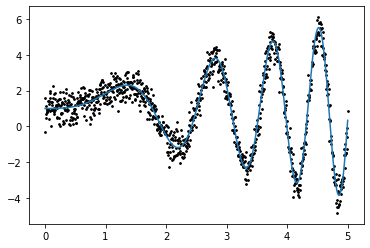

In [13]:
f_x, f_y = f(1000)
X, y = sample(1000)
plt.plot(f_x, f_y)
plt.scatter(X, y, s=3, c="black")
plt.show()

In [14]:
X.shape, y.shape

((1000,), (1000,))

In [16]:
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

In [17]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

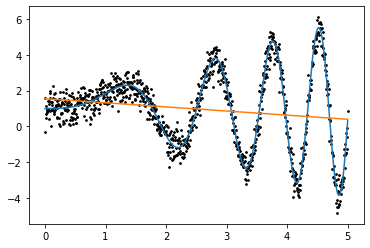

In [18]:
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
plt.scatter(X.flatten(), y.flatten(), s=3, c="black")
plt.plot(X.flatten(), lr.predict(X).flatten())
plt.show()

In [20]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)
X_poly[:10]

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 5.00500501e-03, 2.50500751e-05],
       [1.00000000e+00, 1.00100100e-02, 1.00200300e-04],
       [1.00000000e+00, 1.50150150e-02, 2.25450676e-04],
       [1.00000000e+00, 2.00200200e-02, 4.00801202e-04],
       [1.00000000e+00, 2.50250250e-02, 6.26251878e-04],
       [1.00000000e+00, 3.00300300e-02, 9.01802704e-04],
       [1.00000000e+00, 3.50350350e-02, 1.22745368e-03],
       [1.00000000e+00, 4.00400400e-02, 1.60320481e-03],
       [1.00000000e+00, 4.50450450e-02, 2.02905608e-03]])

In [21]:
lr = LinearRegression(fit_intercept=False)
lr.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

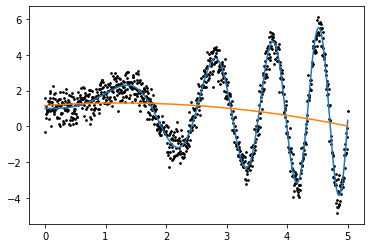

In [22]:
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
plt.scatter(X.flatten(), y.flatten(), s=3, c="black")
plt.plot(X.flatten(), lr.predict(X_poly).flatten())
plt.show()

In [27]:
poly_features = PolynomialFeatures(degree=16)
X_poly = poly_features.fit_transform(X)

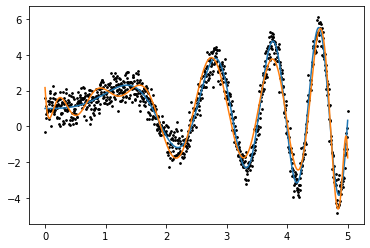

In [28]:
lr = LinearRegression(fit_intercept=False)
lr.fit(X_poly, y)
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
plt.scatter(X.flatten(), y.flatten(), s=3, c="black")
plt.plot(X.flatten(), lr.predict(X_poly).flatten())
plt.show()

In [29]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [30]:
poly_range = list(range(10, 50))
rmse_lr_list = []
rmse_lasso_list = []
rmse_ridge_list = []

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

for poly_value in poly_range:
    poly_features = PolynomialFeatures(degree=poly_value)
    X_poly = poly_features.fit_transform(X)
    
    lr = LinearRegression()
    lr.fit(X_poly, y)
    rmse_lr_list.append(rmse(lr.predict(X_poly), y))
    
    lasso = Lasso()
    lasso.fit(X_poly, y)
    rmse_lasso_list.append(rmse(lr.predict(X_poly), y))
    
    ridge = Ridge()
    ridge.fit(X_poly, y)
    rmse_ridge_list.append(rmse(lr.predict(X_poly), y))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2001.25001484115, tolerance: 0.4407481248660448
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1994.8985879392726, tolerance: 0.4407481248660448
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.00523e-18): result may not be accurate.
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1988.9781061681695, tolerance: 0.4407481248660448
  positive)
C:\ProgramData

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1866.6250291033773, tolerance: 0.4407481248660448
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1859.7845896653184, tolerance: 0.4407481248660448
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1853.1146953639993, tolerance: 0.4407481248660448
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

In [33]:
import pandas as pd
data = {"poly_range" : poly_range, "lr_rmse":rmse_lr_list,
        "lasso_rmse" : rmse_lasso_list, "ridge_rmse" : rmse_ridge_list}

df = pd.DataFrame(data).set_index("poly_range")
df

,lr_rmse,lasso_rmse,ridge_rmse
poly_range,,,
10,1.879811,1.879811,1.879811
11,1.870990,1.870990,1.870990
12,1.622379,1.622379,1.622379
13,1.342030,1.342030,1.342030
14,1.321564,1.321564,1.321564
15,0.914030,0.914030,0.914030
16,0.711302,0.711302,0.711302
17,0.671100,0.671100,0.671100
18,0.689074,0.689074,0.689074


In [34]:
df.min()

lr_rmse       0.530392
lasso_rmse    0.530392
ridge_rmse    0.530392
dtype: float64

In [35]:
df["ridge_rmse"].sort_values().head()

poly_range
23    0.530392
22    0.537667
24    0.602140
21    0.621345
20    0.645075
Name: ridge_rmse, dtype: float64

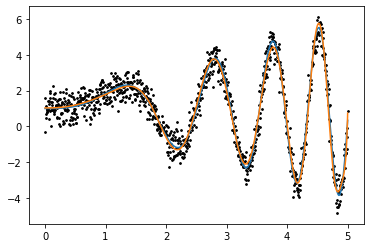

In [37]:
poly_features = PolynomialFeatures(degree=23)
X_poly = poly_features.fit_transform(X)
ridge = Ridge()
ridge.fit(X_poly, y)

f_x, f_y = f(1000)
plt.plot(f_x, f_y)
plt.scatter(X.flatten(), y.flatten(), s=3, c="black")
plt.plot(X.flatten(), ridge.predict(X_poly).flatten())
plt.show()